Elabora un modelo predictivo aplicando el algoritmo K-NN para resolver un problema de clasificación utilizando lenguaje Python.

In [29]:
# Elabora un modelo predictivo aplicando el algoritmo K-NN para
# resolver un problema de clasificación utilizando lenguaje Python.


import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone.head()



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [30]:
#1. Lo primero que debe hacer es eliminar la variable “Sex”.

abalone.drop('Sex', axis=1, inplace=True)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
# 2. Realice estadística descriptiva para el conjunto de datos entregados.

abalone.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


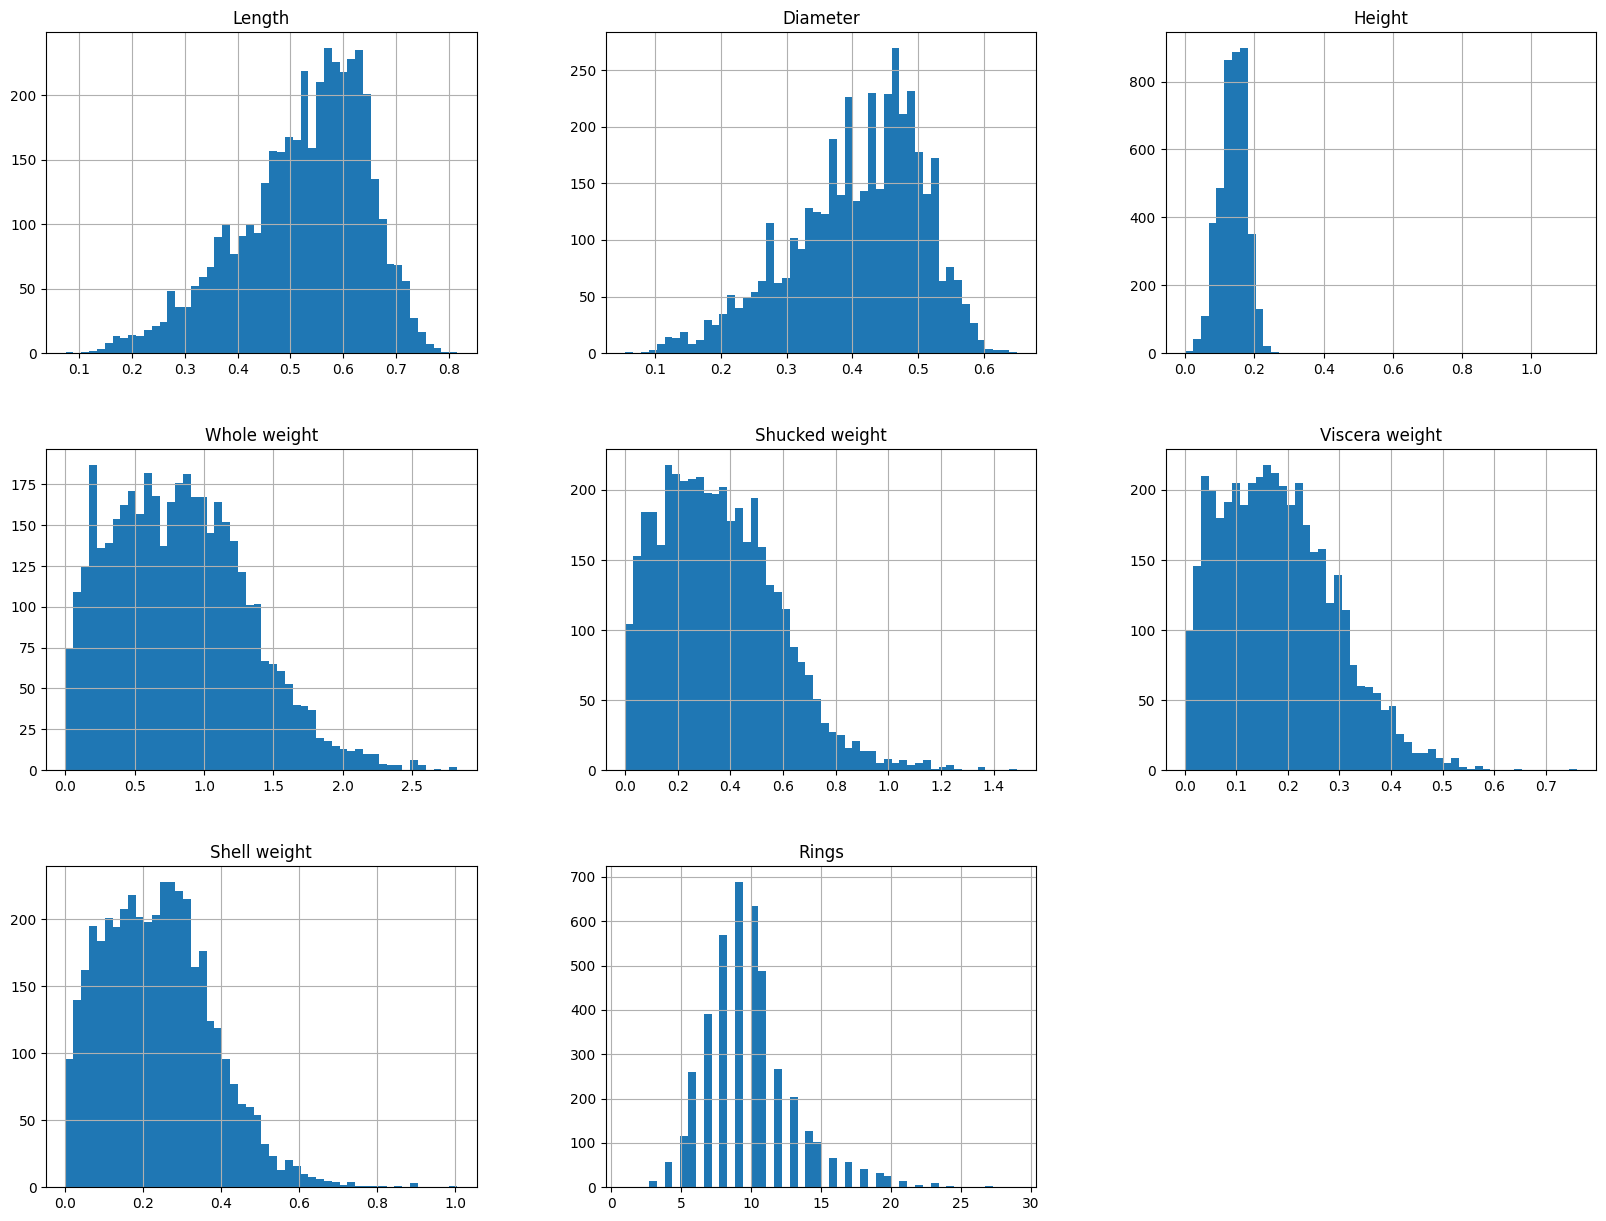

In [33]:
# agregar graficos histogramas
import matplotlib.pyplot as plt 
abalone.hist(bins=50, figsize=(20,15))
plt.show()




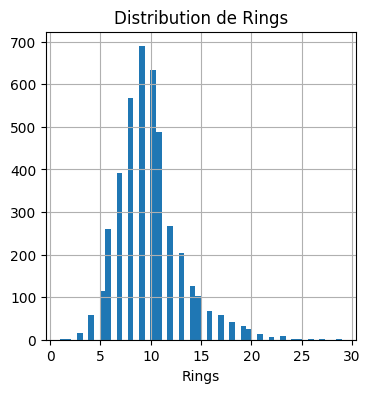

La distribución de los datos es asimetrica positiva, lo que indica que la mayoria de los datos se encuentran 
en la parte izquierda del grafico, es decir, la mayoria de los datos se encuentran entre 5 y 15 anillos.


In [34]:
# 3. La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.

abalone['Rings'].hist(bins=50, figsize=(4,4))
# add title and axis labels
plt.title('Distribution de Rings')
plt.xlabel('Rings')
plt.show()

print ("La distribución de los datos es asimetrica positiva, lo que indica que la mayoria de los datos se encuentran ")
print("en la parte izquierda del grafico, es decir, la mayoria de los datos se encuentran entre 5 y 15 anillos.")




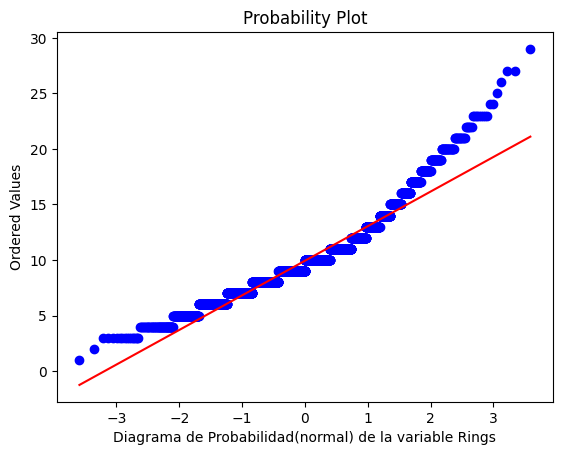

Se puede interpretar que los datos no son normales, ya que la mayoria de los datos se encuentran en la parte izquierda del grafico
 y no en la linea de la normalidad, por lo que se puede decir que los datos no son normales.


In [35]:
from scipy import stats

stats.probplot(abalone['Rings'], plot=plt)
plt.xlabel(f'Diagrama de Probabilidad(normal) de la variable Rings')
plt.show()

print("Se puede interpretar que los datos no son normales, ya que la mayoria de los datos se encuentran en la parte izquierda del grafico")
print(" y no en la linea de la normalidad, por lo que se puede decir que los datos no son normales.")


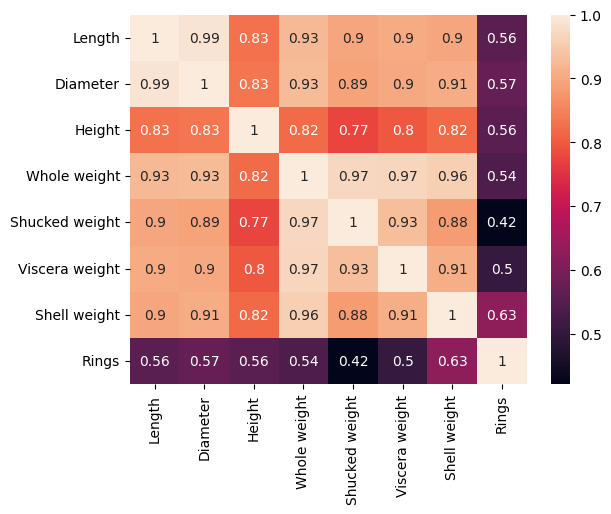

Todas las variables estan altamente correlacionadas,excepto la variable Rings que esta moderadamente correlacionada
con las variables Whole weight, Shucked weight, Viscera weight y Shell weight.


In [36]:
# 4. Entregue la matriz de correlación ¿Qué variables pueden estar correlacionadas?

import numpy as np
import seaborn as sns
corr = abalone.corr()
sns.heatmap(corr, annot=True)
plt.show()

print("Todas las variables estan altamente correlacionadas,excepto la variable Rings que esta moderadamente correlacionada")
print("con las variables Whole weight, Shucked weight, Viscera weight y Shell weight.")





In [38]:
# 5. Defina las distancias en los vectores de las variables independientes.
# Para esto puede usar el atributo .values de Numpy
# 6. Guarde los datos en una matriz y úselo en este código:

#################################################
X = abalone.drop('Rings', axis=1).values # matriz de datos quitando la variable Rings
y = abalone['Rings'].values # vector de la variable Rings

# set new_data_point
new_data_point = np.array([0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208])  # new_data_point no existe... lo generamos nosotros...

print('La matriz X es:')
print (X.shape,type(X))
print()

distances = np.linalg.norm(X - new_data_point, axis=1)
print(distances.shape)
print(abalone.shape)
print()

print('Las distancias son:')
print(distances)
print()


distancias_ordenadas = np.argsort(distances)
print('Las distancias ordenadas son:')
print(distancias_ordenadas)
print()



La matriz X es:
(4177, 7) <class 'numpy.ndarray'>

(4177,)
(4177, 8)

Las distancias son:
[0.59739395 0.9518455  0.40573594 ... 0.20397872 0.14342627 1.10583307]

Las distancias ordenadas son:
[4045 1902 1644 ... 1209  891 1763]



In [39]:
# 7. Determine cuáles son los tres vecinos más cercanos.

print('Los 3 Vecinos mas cercanos son:')
print(distancias_ordenadas[:3])
print()
print(distances[distancias_ordenadas[:3]])
abalone.iloc[distancias_ordenadas[:3]]



Los 3 Vecinos mas cercanos son:
[4045 1902 1644]

[0.03195667 0.03459774 0.03850748]


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4045,0.590,0.450,0.160,0.9980,0.4450,0.2140,0.301,9
1902,0.575,0.455,0.155,1.0130,0.4685,0.2085,0.295,11
1644,0.580,0.460,0.155,1.0335,0.4690,0.2225,0.295,10
